In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/USER/Downloads/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


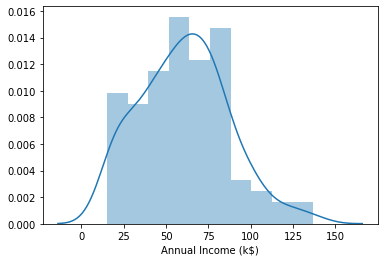

In [14]:
sns.distplot(df["Annual Income (k$)"]);

In [16]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

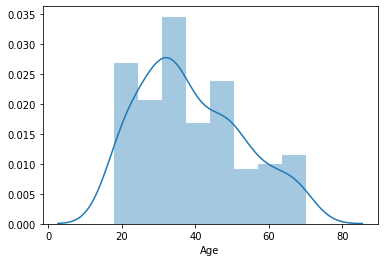

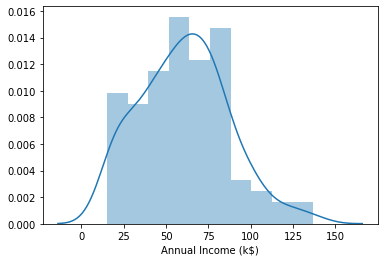

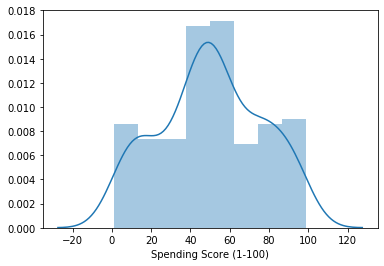

In [20]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in col:
       plt.figure()
       sns.distplot(df[i])

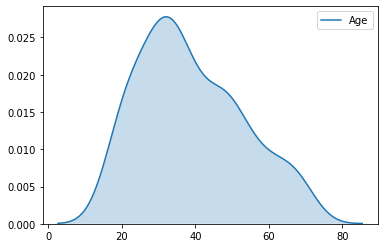

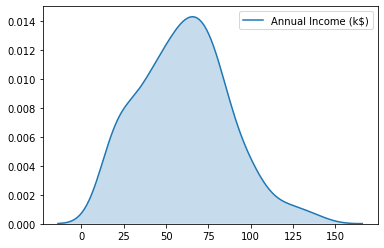

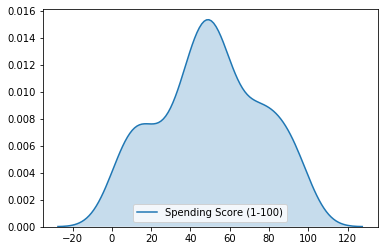

In [27]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in col:
       plt.figure()
       sns.kdeplot(df[i],shade =True)

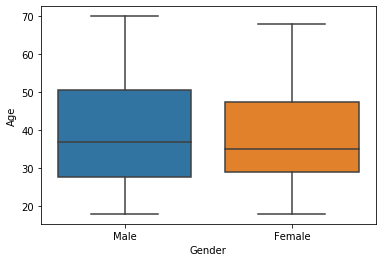

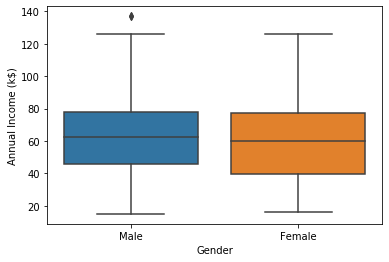

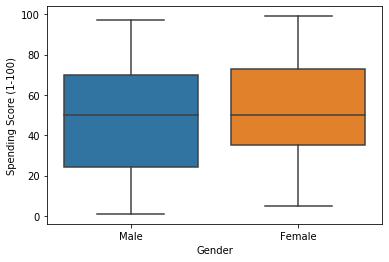

In [28]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in col:
       plt.figure()
       sns.boxplot(data=df, x= 'Gender',y=df[i])

In [31]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

In [ ]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [ ]:
Clustering - Univariate, Bivariate, Multivariate

In [ ]:
clustering1 = KMeans(n_clusters=3)

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

In [ ]:
df['Income Cluster'] = clustering1.labels_
df.head()

In [ ]:
df['Income Cluster'].value_counts()

In [ ]:
clustering1.inertia_

In [ ]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1,11),intertia_scores)

In [ ]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

In [ ]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

In [ ]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [ ]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [ ]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

In [ ]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

In [ ]:
df.to_csv('Clustering.csv')